<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_AnalisisRS/blob/main/Evaluacio%CC%81n_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1

El **grado promedio** de un grafo es una métrica fundamental que cuantifica la densidad de conexiones en la red. Representa el número medio de aristas conectadas a cada nodo. Se calcula mediante la siguiente fórmula:

$$\text{Grado Promedio} = \frac{\sum_{v \in V} \text{grado}(v)}{|V|}$$

Donde:
*   $\sum_{v \in V} \text{grado}(v)$ es la suma de los grados de todos los nodos $v$ en el conjunto de nodos $V$.
*   $|V|$ es el número total de nodos en el grafo.

Una propiedad interesante es que el grado promedio también es igual a $\frac{2|E|}{|V|}$ para grafos no dirigidos, donde $|E|$ es el número de aristas (basado en el *handshaking lemma*).

Escriba una función llamada `av_degree` que cumpla con los siguientes requisitos:
1.  Acepte un objeto grafo de NetworkX (`nx.Graph`) como argumento.
2.  Calcule el grado de cada nodo en el grafo.
3.  Sume los grados de todos los nodos.
4.  Divida la suma total de los grados por el número total de nodos para obtener el grado promedio.
5.  Devuelva el valor del grado promedio calculado (este valor puede ser un número de punto flotante).


In [1]:
import networkx as nx

def av_degree(G: nx.Graph) -> float:
    # your code here
    total_grado = sum(dict(G.degree()).values())
    total_nodos = len(G.nodes())

    if total_nodos == 0:
        return 0.0

    return total_grado / total_nodos
    #raise NotImplementedError

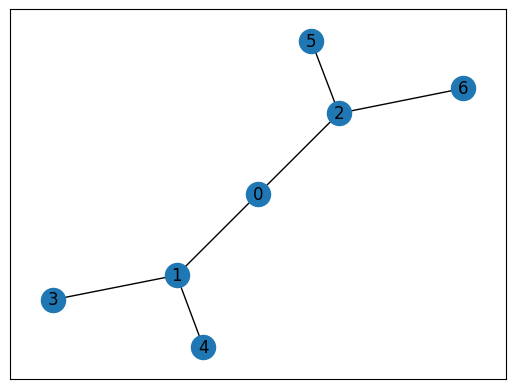

In [2]:
G = nx.Graph()

G.add_edges_from([
    (0, 1),
     (0, 2),
      (1, 3),
       (1, 4),
        (2, 5),
         (2, 6)]
    )
nx.draw_networkx(G, with_labels=True)
assert round((av_degree(G)),2) == 1.71


EJERCICIO 2

En el análisis de grafos, a menudo es útil aislar y estudiar porciones específicas de una red más grande. Una forma común de hacerlo es seleccionando nodos basados en alguna propiedad intrínseca de sus identificadores.

Para este ejercicio, consideraremos grafos cuyos nodos son identificables mediante números enteros. El objetivo es extraer un subgrafo que esté compuesto únicamente por aquellos nodos del grafo original cuyos identificadores sean números pares, junto con todas las aristas que conectan a estos nodos pares entre sí.

Escriba una función llamada `pair_subgraph` que cumpla con los siguientes requisitos:
1.  Acepte un objeto grafo de NetworkX (`nx.Graph` o `nx.DiGraph`) como argumento. Se asume que los identificadores de los nodos en este grafo son numéricos (por ejemplo, enteros), lo que permite la operación de paridad.
2.  Itere sobre todos los nodos del grafo de entrada `G`.
3.  Seleccione únicamente aquellos nodos cuyo identificador sea un número par (es decir, `nodo % 2 == 0`).
4.  Genere un nuevo grafo que sea un subgrafo del grafo original `G`. Este subgrafo debe:
    a.  Contener exclusivamente los nodos pares identificados.
    b.  Incluir todas las aristas presentes en `G` que conecten cualquier par de estos nodos pares seleccionados.
5.  La función debe devolver este nuevo subgrafo. El tipo del grafo devuelto (dirigido o no dirigido) debe coincidir con el del grafo de entrada.


In [3]:
def pair_subgraph(G: nx.Graph) -> nx.Graph:
    # your code here
    nodos_pares = [n for n in G.nodes() if n % 2 == 0]
    subG = G.subgraph(nodos_pares).copy()

    return subG
    #raise NotImplementedError

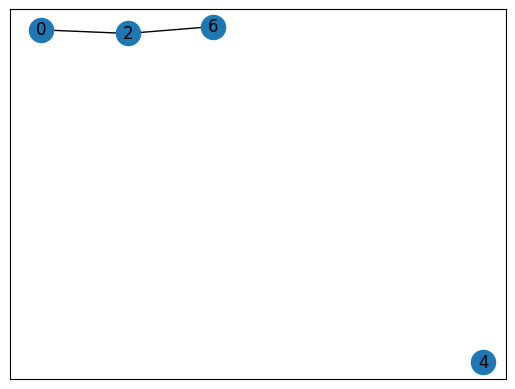

In [4]:
G = nx.Graph()

G.add_edges_from([
    (0, 1),
     (0, 2),
      (1, 3),
       (1, 4),
        (2, 5),
         (2, 6)]
    )
G_f = nx.Graph()
G_f.add_node(4)
G_f.add_edges_from([
     (0, 2),
         (2, 6)]
    )
nx.draw_networkx(pair_subgraph(G), with_labels=True)
assert pair_subgraph(G).nodes == G_f.nodes
